# DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together points that are closely packed together, while marking points that are isolated as noise. It is particularly useful for discovering clusters of arbitrary shape in spatial data.

## Use Cases
- Geospatial Data: Identifying geographic regions with high activity.
- Image Segmentation: Grouping pixels in image processing.
- Anomaly Detection: Detecting outliers in datasets.
- Market Segmentation: Grouping customers based on purchasing behavior.

## Advantages
- Arbitrary Shape: Can find clusters of any shape.
- Noise Handling: Identifies and handles noise points effectively.
- Minimal Parameter Requirement: Requires only two parameters (epsilon and minPts).

## Disadvantages
- Parameter Sensitivity: Results can vary significantly with different values of epsilon and minPts.
- Computational Complexity: Can be computationally intensive on large datasets.
- Scaling Issues: Does not scale well to high-dimensional data.

## Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import itertools


## plot_elbow_method

In [26]:
def plot_elbow_method(X):
    """
    Plots the elbow method to determine the optimal epsilon value for DBSCAN.
    """
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, 1], axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.title("Elbow Method for Optimal Epsilon")
    plt.grid(True)
    plt.yticks(np.arange(min(distances), max(distances), step=(max(distances) - min(distances)) / 10))  # Show more y-axis values
    plt.show()


## grid_search_minpts 

In [27]:
def grid_search_minpts(X, eps, feature_count):
    """
    Performs a grid search to determine the optimal minPts value for DBSCAN.
    """
    minPts_range = range(feature_count + 1, 2 * feature_count + 1)
    if feature_count == 1:
        minPts_range = [3, 4]

    best_minPts = minPts_range[0]
    best_silhouette = -1

    for minPts in minPts_range:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        labels = dbscan.fit_predict(X)

        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_minPts = minPts

    return best_minPts


## dbscan_clustering

In [28]:
def dbscan_clustering(X, min_samples=None):
    """
    Performs DBSCAN clustering on the dataset X and determines the optimal
    epsilon and minPts values. If min_samples is provided, it is used directly.
    """
    feature_count = X.shape[1]

    # Step 1: Determine optimal epsilon using elbow method
    plot_elbow_method(X)
    eps = float(input("Enter the optimal epsilon value from the elbow plot: "))

    # Step 2: Determine optimal minPts using grid search or use provided min_samples
    if min_samples is None:
        optimal_minPts = grid_search_minpts(X, eps, feature_count)
        print(f"Optimal minPts: {optimal_minPts}")
    else:
        optimal_minPts = min_samples
        print(f"Using provided min_samples: {optimal_minPts}")

    # Step 3: Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=optimal_minPts)
    labels = dbscan.fit_predict(X)

    # Count the number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Number of clusters: {n_clusters}")

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black used for noise.

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title("DBSCAN Clustering Results")
    plt.show()

    return labels


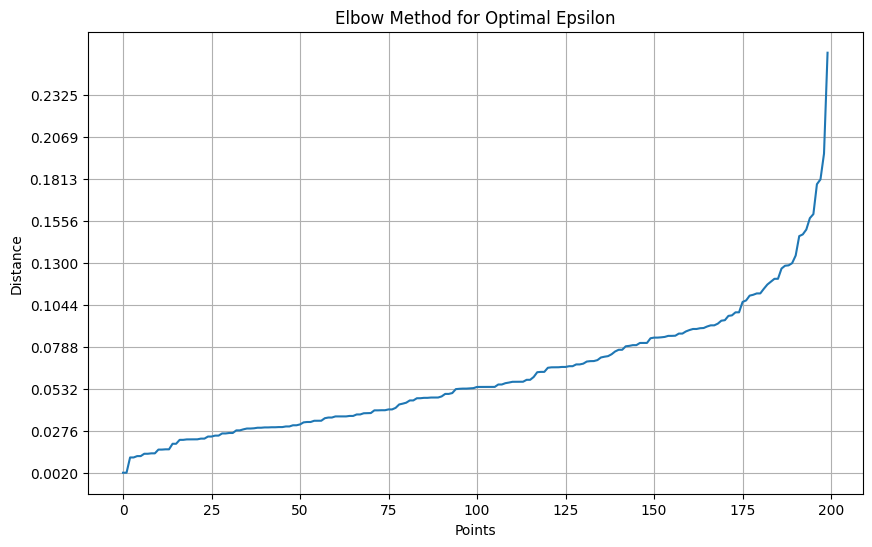

Optimal minPts: 3
Number of clusters: 20


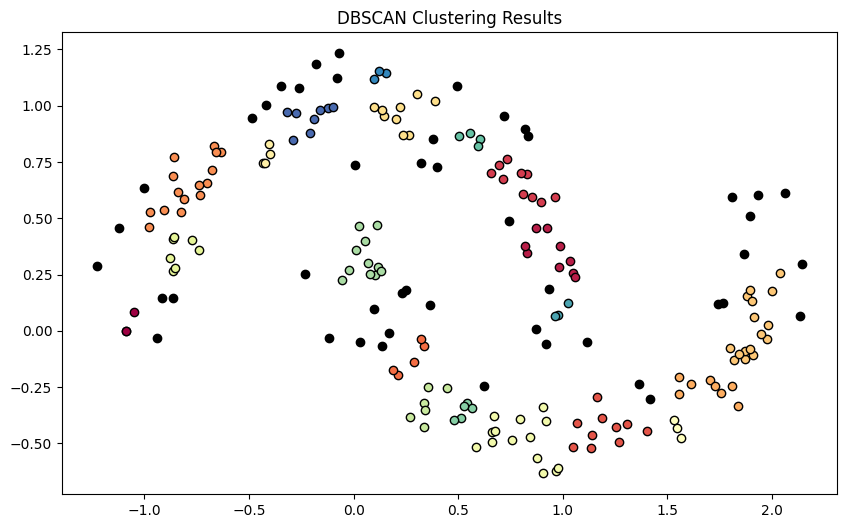

In [32]:
from sklearn.datasets import make_blobs, make_moons

# Generate sample data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Perform DBSCAN clustering
labels = dbscan_clustering(X)
